- 매출액에 영향을 주는 요인에는 어떤 것이 있을까?(성별매출금액,연령대별매출금액,생활인구수, 평일, 주말, 시간대별 어떤 업종이 매출이 높은지?) 월화수목금토일중에 매출금액 , 주중 주말?

- 나이가 많은 사람들은 어떤 업종 종목에서 소비를 할가?(ex.60대는 병원 쪽, 30,40,50대는 학원결제?(아이가진사람),20대는 음식점)60대가 많이살고있는 곳에 의원 점포수가 적으면 의원내라 추천 서비스 

- 전통시장의 매출이 다른 상권(대형마트?)에 비해 매출이 낮을까?(또는 연령대 분석을 통해 어떤 업종으로 사람들을 유입시킬까 추
천?)

- 상권구분코드별로 어떤 업종이 제일 많을까?하나씩 보여주자 groupby count

- 같은 기간 동안(분기별) 상권구분코드(4종류) 매출의 추이...모델링:단순 이동평균(SMA)?????????????????????????

- 교육매출이 크면?편의점매출도 크다?상관관계

###### 성별과 연령대와 상관없는 법인카드내역이 분기별매출 건수,금액에 잡혀있음 주의!


### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

In [3]:
df = pd.read_csv('seoul.csv', encoding='CP949')
print(df)

        기준_년_코드  기준_분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드      상권_코드_명 서비스_업종_코드  \
0          2022         4        U       관광특구  1001496  강남 마이스 관광특구  CS300043   
1          2022         4        U       관광특구  1001496  강남 마이스 관광특구  CS300032   
2          2022         4        U       관광특구  1001496  강남 마이스 관광특구  CS300031   
3          2022         4        U       관광특구  1001496  강남 마이스 관광특구  CS300028   
4          2022         4        U       관광특구  1001496  강남 마이스 관광특구  CS300026   
...         ...       ...      ...        ...      ...          ...       ...   
136815     2022         1        A       골목상권  2110001       이북5도청사  CS200001   
136816     2022         1        A       골목상권  2110001       이북5도청사  CS100010   
136817     2022         1        A       골목상권  2110001       이북5도청사  CS100009   
136818     2022         1        A       골목상권  2110001       이북5도청사  CS100008   
136819     2022         1        A       골목상권  2110001       이북5도청사  CS100001   

       서비스_업종_코드_명   분기당_매출

In [4]:
df=df.rename(columns = {'기준_년_코드':'STDR_YY_CD',
                       '기준_분기_코드':'STDR_QU_CD',
                       '상권_구분_코드':'TRDAR_SE_CD',
                       '상권_구분_코드_명':'TRDAR_SE_CD_NM',
                       '상권_코드':'TRDAR_CD',
                       '상권_코드_명':'TRDAR_CD_NM',
                       '서비스_업종_코드':'SVC_INDUTY_CD',
                       '서비스_업종_코드_명':'SVC_INDUTY_CD_NM',
                       '분기당_매출_금액':'THSMON_SELNG_AMT',
                       '분기당_매출_건수':'THSMON_SELNG_CO',
                       '주중_매출_비율':'MDWK_SELNG_RATE',
                       '주말_매출_비율':'WKEND_SELNG_RATE',
                       '월요일_매출_비율':'MON_SELNG_RATE',
                       '화요일_매출_비율':'TUES_SELNG_RATE',
                       '수요일_매출_비율':'WED_SELNG_RATE',
                       '목요일_매출_비율':'THUR_SELNG_RATE',
                       '금요일_매출_비율':'FRI_SELNG_RATE',
                       '토요일_매출_비율':'SAT_SELNG_RATE',
                       '일요일_매출_비율':'SUN_SELNG_RATE',
                       '시간대_00~06_매출_비율':'TMZON_00_06_SELNG_RATE',
                       '시간대_06~11_매출_비율':'TMZON_06_11_SELNG_RATE',
                       '시간대_11~14_매출_비율':'TMZON_11_14_SELNG_RATE',
                       '시간대_14~17_매출_비율':'TMZON_14_17_SELNG_RATE',
                       '시간대_17~21_매출_비율':'TMZON_17_21_SELNG_RATE',
                       '시간대_21~24_매출_비율':'TMZON_21_24_SELNG_RATE',
                       '남성_매출_비율':'ML_SELNG_RATE',
                       '여성_매출_비율':'FML_SELNG_RATE',
                       '연령대_10_매출_비율':'AGRDE_10_SELNG_RATE',
                       '연령대_20_매출_비율':'AGRDE_20_SELNG_RATE',
                       '연령대_30_매출_비율':'AGRDE_30_SELNG_RATE',
                       '연령대_40_매출_비율':'AGRDE_40_SELNG_RATE',
                       '연령대_50_매출_비율':'AGRDE_50_SELNG_RATE',
                       '연령대_60_이상_매출_비율':'AGRDE_60_ABOVE_SELNG_RATE',
                       '주중_매출_금액':'MDWK_SELNG_AMT',
                       '주말_매출_금액':'WKEND_SELNG_AMT',
                       '월요일_매출_금액':'MON_SELNG_AMT',
                       '화요일_매출_금액':'TUES_SELNG_AMT',
                       '수요일_매출_금액':'WED_SELNG_AMT',
                       '목요일_매출_금액':'THUR_SELNG_AMT',
                       '금요일_매출_금액':'FRI_SELNG_AMT',
                       '토요일_매출_금액':'SAT_SELNG_AMT',
                       '일요일_매출_금액':'SUN_SELNG_AMT',
                       '시간대_00~06_매출_금액':'TMZON_00_06_SELNG_AMT',
                       '시간대_06~11_매출_금액':'TMZON_06_11_SELNG_AMT',
                       '시간대_11~14_매출_금액':'TMZON_11_14_SELNG_AMT',
                       '시간대_14~17_매출_금액':'TMZON_14_17_SELNG_AMT',
                       '시간대_17~21_매출_금액':'TMZON_17_21_SELNG_AMT',
                       '시간대_21~24_매출_금액':'TMZON_21_24_SELNG_AMT',
                       '남성_매출_금액':'ML_SELNG_AMT',
                       '여성_매출_금액':'FML_SELNG_AMT',
                       '연령대_10_매출_금액':'AGRDE_10_SELNG_AMT',
                       '연령대_20_매출_금액':'AGRDE_20_SELNG_AMT',
                       '연령대_30_매출_금액':'AGRDE_30_SELNG_AMT',
                       '연령대_40_매출_금액':'AGRDE_40_SELNG_AMT',
                       '연령대_50_매출_금액':'AGRDE_50_SELNG_AMT',
                       '연령대_60_이상_매출_금액':'AGRDE_60_ABOVE_SELNG_AMT',
                       '주중_매출_건수':'MDWK_SELNG_CO',
                       '주말_매출_건수':'WKEND_SELNG_CO',
                       '월요일_매출_건수':'MON_SELNG_CO',
                       '화요일_매출_건수':'TUES_SELNG_CO',
                       '수요일_매출_건수':'WED_SELNG_CO',
                       '목요일_매출_건수':'THUR_SELNG_CO',
                       '금요일_매출_건수':'FRI_SELNG_CO',
                       '토요일_매출_건수':'SAT_SELNG_CO',
                       '일요일_매출_건수':'SUN_SELNG_CO',
                       '시간대_건수~06_매출_건수':'TMZON_00_06_SELNG_CO',
                       '시간대_건수~11_매출_건수':'TMZON_06_11_SELNG_CO',
                       '시간대_건수~14_매출_건수':'TMZON_11_14_SELNG_CO',
                       '시간대_건수~17_매출_건수':'TMZON_14_17_SELNG_CO',
                       '시간대_건수~21_매출_건수':'TMZON_17_21_SELNG_CO',
                       '시간대_건수~24_매출_건수':'TMZON_21_24_SELNG_CO',
                       '남성_매출_건수':'ML_SELNG_CO',
                       '여성_매출_건수':'FML_SELNG_CO',
                       '연령대_10_매출_건수':'AGRDE_10_SELNG_CO',
                       '연령대_20_매출_건수':'AGRDE_20_SELNG_CO',
                       '연령대_30_매출_건수':'AGRDE_30_SELNG_CO',
                       '연령대_40_매출_건수':'AGRDE_40_SELNG_CO',
                       '연령대_50_매출_건수':'AGRDE_50_SELNG_CO',
                       '연령대_60_이상_매출_건수':'AGRDE_60_ABOVE_SELNG_CO',
                       '점포수':'STOR_CO'})



### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [5]:
NUM_TRDAR_SE=len(df['TRDAR_SE_CD_NM'].unique())
NUM_TRDAR=len(df['TRDAR_CD_NM'].unique())
NUM_SVC_INDUTY=len(df['SVC_INDUTY_CD_NM'].unique())

print(f'상권 구분 : {NUM_TRDAR_SE}')
print(f'상권 : {NUM_TRDAR}')
print(f'서비스 업종 : {NUM_SVC_INDUTY}')


상권 구분 : 4
상권 : 1650
서비스 업종 : 63


In [6]:
print("데이터 모형 \t"
      , df.shape)

print("\n컬럼별 타입")
print(df.dtypes)

print("\n컬럼별 null값 존재여부")
print(df.isnull().sum())

print("\n상권구분코드 목록")
print(list(set(df['TRDAR_SE_CD_NM'])))

print("\서비스업종코드 목록 값")
print(list(set(df['SVC_INDUTY_CD_NM'])))

데이터 모형 	 (136820, 80)

컬럼별 타입
STDR_YY_CD                  int64
STDR_QU_CD                  int64
TRDAR_SE_CD                object
TRDAR_SE_CD_NM             object
TRDAR_CD                    int64
                            ...  
AGRDE_30_SELNG_CO           int64
AGRDE_40_SELNG_CO           int64
AGRDE_50_SELNG_CO           int64
AGRDE_60_ABOVE_SELNG_CO     int64
STOR_CO                    object
Length: 80, dtype: object

컬럼별 null값 존재여부
STDR_YY_CD                 0
STDR_QU_CD                 0
TRDAR_SE_CD                0
TRDAR_SE_CD_NM             0
TRDAR_CD                   0
                          ..
AGRDE_30_SELNG_CO          0
AGRDE_40_SELNG_CO          0
AGRDE_50_SELNG_CO          0
AGRDE_60_ABOVE_SELNG_CO    0
STOR_CO                    0
Length: 80, dtype: int64

상권구분코드 목록
['골목상권', '전통시장', '관광특구', '발달상권']
\서비스업종코드 목록 값
['호프-간이주점', '예술학원', '인테리어', '철물점', '일반의류', '부동산중개업', '커피-음료', '의약품', '스포츠 강습', '자전거 및 기타운송장비', '골프연습장', '가전제품수리', '피부관리실', '양식음식점', 'PC방', '자동차미용', '문구'

In [7]:
# 상권업종대분류 컬럼 생성
df['SVC_INDUTY_BIGCD_NM'] = df['SVC_INDUTY_CD_NM'].apply(lambda x: '소매' if x in ['애완동물','자전거 및 기타운송장비','조명용품','완구','육류판매','가전제품', '서적', '철물점','화장품','제과점', 
                                                                                 '전자상거래업', '청과상', '핸드폰', '컴퓨터및주변장치판매', '반찬가게','가방', '가구', '슈퍼마켓', '화초', '인테리어', 
                                                                                 '수산물판매','미곡판매', '일반의류', '문구', '편의점', '의료기기', '신발', '안경','시계및귀금속']
                                             else '음식점' if x in ['일식음식점', '패스트푸드점', '한식음식점', '중식음식점', '분식전문점', '커피-음료', '양식음식점', '치킨전문점']
                                             else '여가/오락' if x in ['당구장', '네일숍','피부관리실' ,'PC방','노래방', '여관','자동차미용'] 
                                             else '스포츠'if x in['스포츠클럽','운동/경기용품', '스포츠 강습' ,'골프연습장']
                                             else '의원' if x in ['일반의원', '치과의원' , '한의원']
                                             else '생활서비스'if x in['부동산중개업', '미용실','세탁소','자동차수리']
                                             else '학원/교육')

# 결과 출력
print(df)


        STDR_YY_CD  STDR_QU_CD TRDAR_SE_CD TRDAR_SE_CD_NM  TRDAR_CD  \
0             2022           4           U           관광특구   1001496   
1             2022           4           U           관광특구   1001496   
2             2022           4           U           관광특구   1001496   
3             2022           4           U           관광특구   1001496   
4             2022           4           U           관광특구   1001496   
...            ...         ...         ...            ...       ...   
136815        2022           1           A           골목상권   2110001   
136816        2022           1           A           골목상권   2110001   
136817        2022           1           A           골목상권   2110001   
136818        2022           1           A           골목상권   2110001   
136819        2022           1           A           골목상권   2110001   

        TRDAR_CD_NM SVC_INDUTY_CD SVC_INDUTY_CD_NM  THSMON_SELNG_AMT  \
0       강남 마이스 관광특구      CS300043           전자상거래업           4770649   
1  

### 04. 기술통계량 계산하기 Descriptive Statistics
- 데이터셋을 요약하기 위해 일부 기술통계량을 계산합니다.

In [8]:
df.describe()

,STDR_YY_CD,STDR_QU_CD,TRDAR_CD,THSMON_SELNG_AMT,THSMON_SELNG_CO,MDWK_SELNG_RATE,WKEND_SELNG_RATE,MON_SELNG_RATE,TUES_SELNG_RATE,WED_SELNG_RATE,...,TMZON_17_21_SELNG_CO,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
count,136820.0,136820.000000,1.368200e+05,1.368200e+05,1.368200e+05,136820.000000,136820.000000,136820.000000,136820.000000,136820.000000,...,1.368200e+05,136820.000000,1.368200e+05,1.368200e+05,136820.000000,1.368200e+05,1.368200e+05,1.368200e+05,1.368200e+05,1.368200e+05
mean,2022.0,2.491573,2.107340e+06,7.140768e+08,2.658305e+04,76.295242,23.793853,14.624265,14.985682,15.051754,...,7.033422e+03,2306.869968,1.358227e+04,1.188495e+04,429.376670,5.390227e+03,6.014779e+03,5.093266e+03,4.633586e+03,3.905966e+03
std,0.0,1.117869,1.001047e+05,6.167504e+09,1.144280e+05,16.419218,16.432206,11.660334,11.617021,11.540572,...,2.775184e+04,11126.959552,6.112513e+04,5.038695e+04,2672.798836,2.749656e+04,2.880955e+04,2.158318e+04,1.915810e+04,2.594597e+04
min,2022.0,1.000000,1.001491e+06,6.300000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,1.000000,2.110467e+06,2.716624e+07,4.810000e+02,67.000000,12.000000,9.000000,10.000000,10.000000,...,1.220000e+02,0.000000,2.190000e+02,1.790000e+02,0.000000,2.000000e+01,5.600000e+01,8.900000e+01,9.100000e+01,5.400000e+01
50%,2022.0,2.000000,2.110941e+06,1.049553e+08,2.521000e+03,76.000000,24.000000,13.000000,14.000000,14.000000,...,7.000000e+02,23.000000,1.243000e+03,1.024000e+03,0.000000,2.170000e+02,3.940000e+02,4.970000e+02,5.290000e+02,3.590000e+02
75%,2022.0,3.000000,2.120175e+06,4.052279e+08,1.438550e+04,88.000000,34.000000,17.000000,18.000000,17.000000,...,4.034000e+03,533.000000,7.035000e+03,6.259000e+03,90.000000,1.819250e+03,2.623250e+03,2.699000e+03,2.727000e+03,1.986000e+03
max,2022.0,4.000000,2.130326e+06,7.783637e+11,9.709319e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,3.000405e+06,498954.000000,5.363531e+06,3.583597e+06,191778.000000,1.792524e+06,1.712991e+06,1.704790e+06,1.947979e+06,2.711945e+06


In [9]:
print(df['SVC_INDUTY_CD_NM'].value_counts())

한식음식점           6079
미용실             5342
커피-음료           4892
편의점             4758
슈퍼마켓            4568
                ... 
가방               472
고시원              326
완구               246
자전거 및 기타운송장비     186
부동산중개업            98
Name: SVC_INDUTY_CD_NM, Length: 63, dtype: int64


In [10]:
print(df['SVC_INDUTY_BIGCD_NM'].value_counts())

소매       50036
음식점      28638
학원/교육    17289
여가/오락    13809
생활서비스    11056
의원        9348
스포츠       6644
Name: SVC_INDUTY_BIGCD_NM, dtype: int64


In [11]:
#서비스업종코드별로 남성과 여성 매출 건수 평균
df.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_CO', 'FML_SELNG_CO']].sort_values(by='ML_SELNG_CO',ascending=False)

,ML_SELNG_CO,FML_SELNG_CO
SVC_INDUTY_CD_NM,,
편의점,110641.664355,62569.870744
PC방,37523.865423,8800.774817
수산물판매,36006.853571,33410.015476
의약품,34115.550259,39039.184456
커피-음료,33312.100368,39162.815413
...,...,...
예술학원,238.188652,368.452837
고시원,197.619632,71.904908
스포츠 강습,189.387413,308.701399


In [12]:
#편의점에서 남성의 매출건수가 매우 높게 나왔다, 반면에 매출 금액의 합은 한식음식점에서 더 높게 측정되었다.
#따라서 편의점은 작은것(음식값 보다 가격이 낮음)을 자주 구매하러 가기 때문에 건수가 많이 측정되는것을 알수있다.

In [13]:
#서비스업종코드별로 남성과 여성 매출 금액의 합계
df.groupby(['SVC_INDUTY_CD_NM']).sum()[['ML_SELNG_AMT', 'FML_SELNG_AMT']].sort_values(by='ML_SELNG_AMT',ascending=False)

,ML_SELNG_AMT,FML_SELNG_AMT
SVC_INDUTY_CD_NM,,
한식음식점,6413185139508,3790723841531
편의점,3419612478682,1772456806940
의약품,3235662089909,2913033682177
일반의원,2057259227731,3537638453638
일반의류,2042276559445,3807240260761
...,...,...
자동차미용,26082206027,10679428494
가전제품수리,19156313482,15462875830
고시원,15460988519,6574262130


In [14]:
#서비스업종코드별로 남성과 여성 매출 비율 평균
df.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']].sort_values(by='ML_SELNG_RATE',ascending=False)

,ML_SELNG_RATE,FML_SELNG_RATE
SVC_INDUTY_CD_NM,,
당구장,88.388889,11.702963
PC방,81.942039,18.144570
노래방,81.236895,18.867660
여관,77.604167,22.489268
골프연습장,75.421093,24.679754
...,...,...
섬유제품,34.693012,65.386855
화장품,32.172877,67.912387
일반의류,27.977816,72.106777


In [15]:
#서비스업종 대분류코드별로 남성과 여성 매출 건수 평균
df.groupby(['SVC_INDUTY_BIGCD_NM']).mean()[['ML_SELNG_CO', 'FML_SELNG_CO']].sort_values(by='ML_SELNG_CO',ascending=False)

,ML_SELNG_CO,FML_SELNG_CO
SVC_INDUTY_BIGCD_NM,,
소매,19985.327804,17014.409485
음식점,17715.713807,16013.381940
학원/교육,9430.789462,10050.558216
의원,8854.217373,10660.538297
여가/오락,5461.250778,1656.571656
생활서비스,1712.792330,1262.932797
스포츠,1629.828266,890.669627


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 [Text(0, 0, '전자상거래업'),
  Text(1, 0, '가전제품'),
  Text(2, 0, '가구'),
  Text(3, 0, '화초'),
  Text(4, 0, '완구'),
  Text(5, 0, '운동/경기용품'),
  Text(6, 0, '화장품'),
  Text(7, 0, '문구'),
  Text(8, 0, '의약품'),
  Text(9, 0, '시계및귀금속'),
  Text(10, 0, '안경'),
  Text(11, 0, '가방'),
  Text(12, 0, '신발'),
  Text(13, 0, '일반의류'),
  Text(14, 0, '반찬가게'),
  Text(15, 0, '핸드폰'),
  Text(16, 0, '컴퓨터및주변장치판매'),
  Text(17, 0, '편의점'),
  Text(18, 0, '슈퍼마켓'),
  Text(19, 0, '피부관리실'),
  Text(20, 0, '네일숍'),
  Text(21, 0, '미용실'),
  Text(22, 0, '스포츠클럽'),
  Text(23, 0, '치과의원'),
  Text(24, 0, '일반의원'),
  Text(25, 0, '커피-음료'),
  Text(26, 0, '분식전문점'),
  Text(27, 0, '패스트푸드점'),
  Text(28, 0, '제과점'),
  Text(29, 0, '양식음식점'),
  Text(30, 0, '일식음식점'),
  Text(31, 

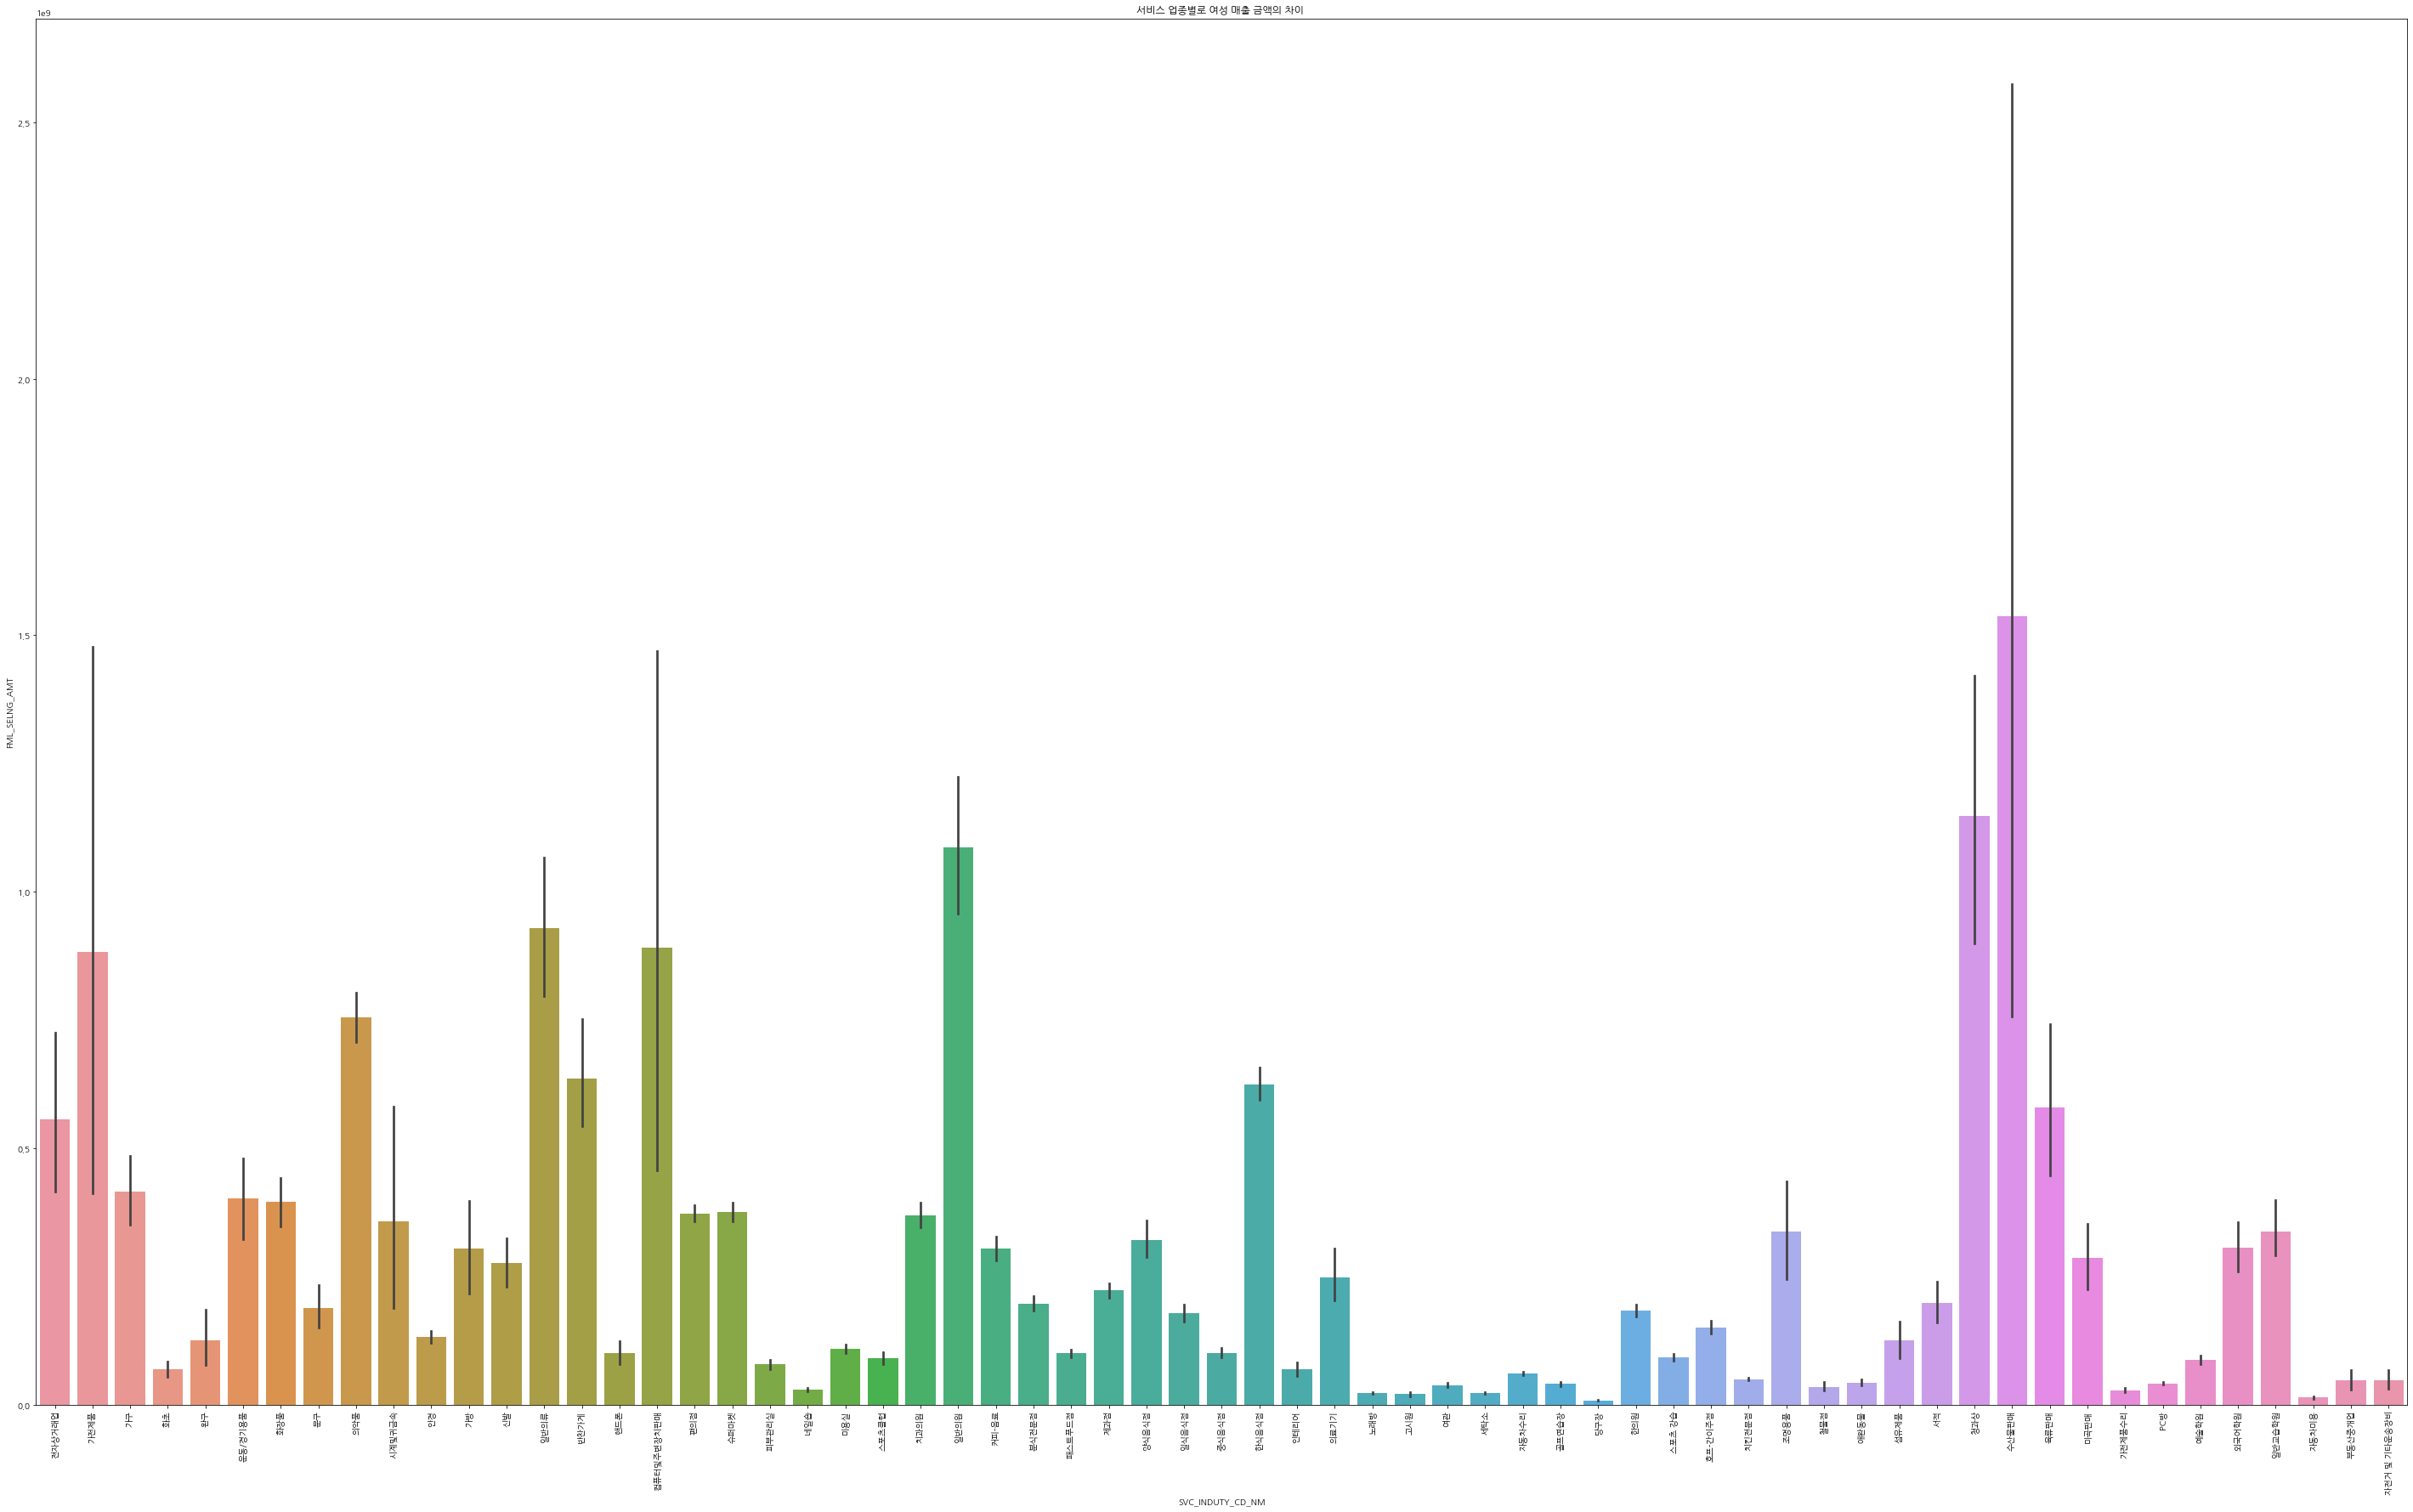

In [16]:
#서비스 업종별로 여성,남성 매출 금액의 차이 (성별에 따라 어떤 업종에서 소비 금액이 높을까?)
plt.figure(figsize=(50,30))
plt.title('서비스 업종별로 여성 매출 금액의 차이 ')
sns.barplot(data=df, x='SVC_INDUTY_CD_NM', y='FML_SELNG_AMT')
plt.xticks(rotation =90)

In [17]:
#상권구분별로 매출금액의 평균
w=df.groupby('TRDAR_SE_CD_NM')['FML_SELNG_AMT'].mean()
m=df.groupby('TRDAR_SE_CD_NM')['ML_SELNG_AMT'].mean()

print("상권구분코드별로 여성매출금액 평균 ", round(w, 2))
print("\n상권구분코드별로 남성매출금액 평균 ", round(m, 2))

상권구분코드별로 여성매출금액 평균  TRDAR_SE_CD_NM
골목상권    1.108321e+08
관광특구    2.085903e+09
발달상권    6.532943e+08
전통시장    3.269990e+08
Name: FML_SELNG_AMT, dtype: float64

상권구분코드별로 남성매출금액 평균  TRDAR_SE_CD_NM
골목상권    1.353916e+08
관광특구    1.937396e+09
발달상권    7.313078e+08
전통시장    2.906272e+08
Name: ML_SELNG_AMT, dtype: float64


### 05. 단변량,이변량,다변량 분석
#### 단변량
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)
#### 이변량
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.
#### 다변량
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

(array([0, 1, 2, 3]),
 [Text(0, 0, '골목상권'),
  Text(1, 0, '발달상권'),
  Text(2, 0, '전통시장'),
  Text(3, 0, '관광특구')])

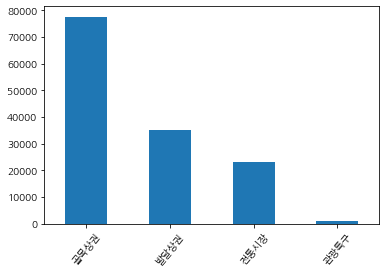

In [18]:
df_cnt=df['TRDAR_SE_CD_NM'].value_counts()
df_cnt.plot.bar()
plt.xticks(rotation=50)
#plt.show()
#상권코드를 기준으로 count한 그래프 

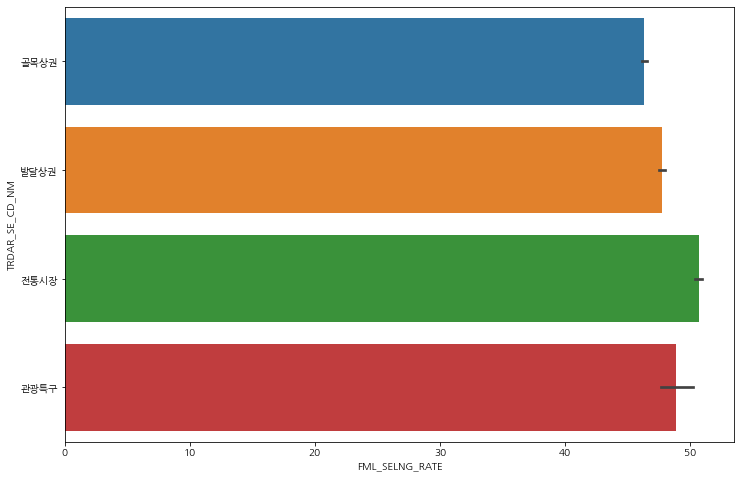

In [19]:
#상권구분코드별로 여성 매출 비율 그래프 
plt.figure(figsize=(12,8))  #size 조절
plt.xticks(rotation = 0)  #x축 조절

sns.barplot(data=df.sort_values(by='FML_SELNG_RATE', ascending=False), x = 'FML_SELNG_RATE',y = 'TRDAR_SE_CD_NM')
plt.show()

전통시장의 여성 매출 비율이 50%로 비율이 높고, 그다음으로 관광특구가 높다.

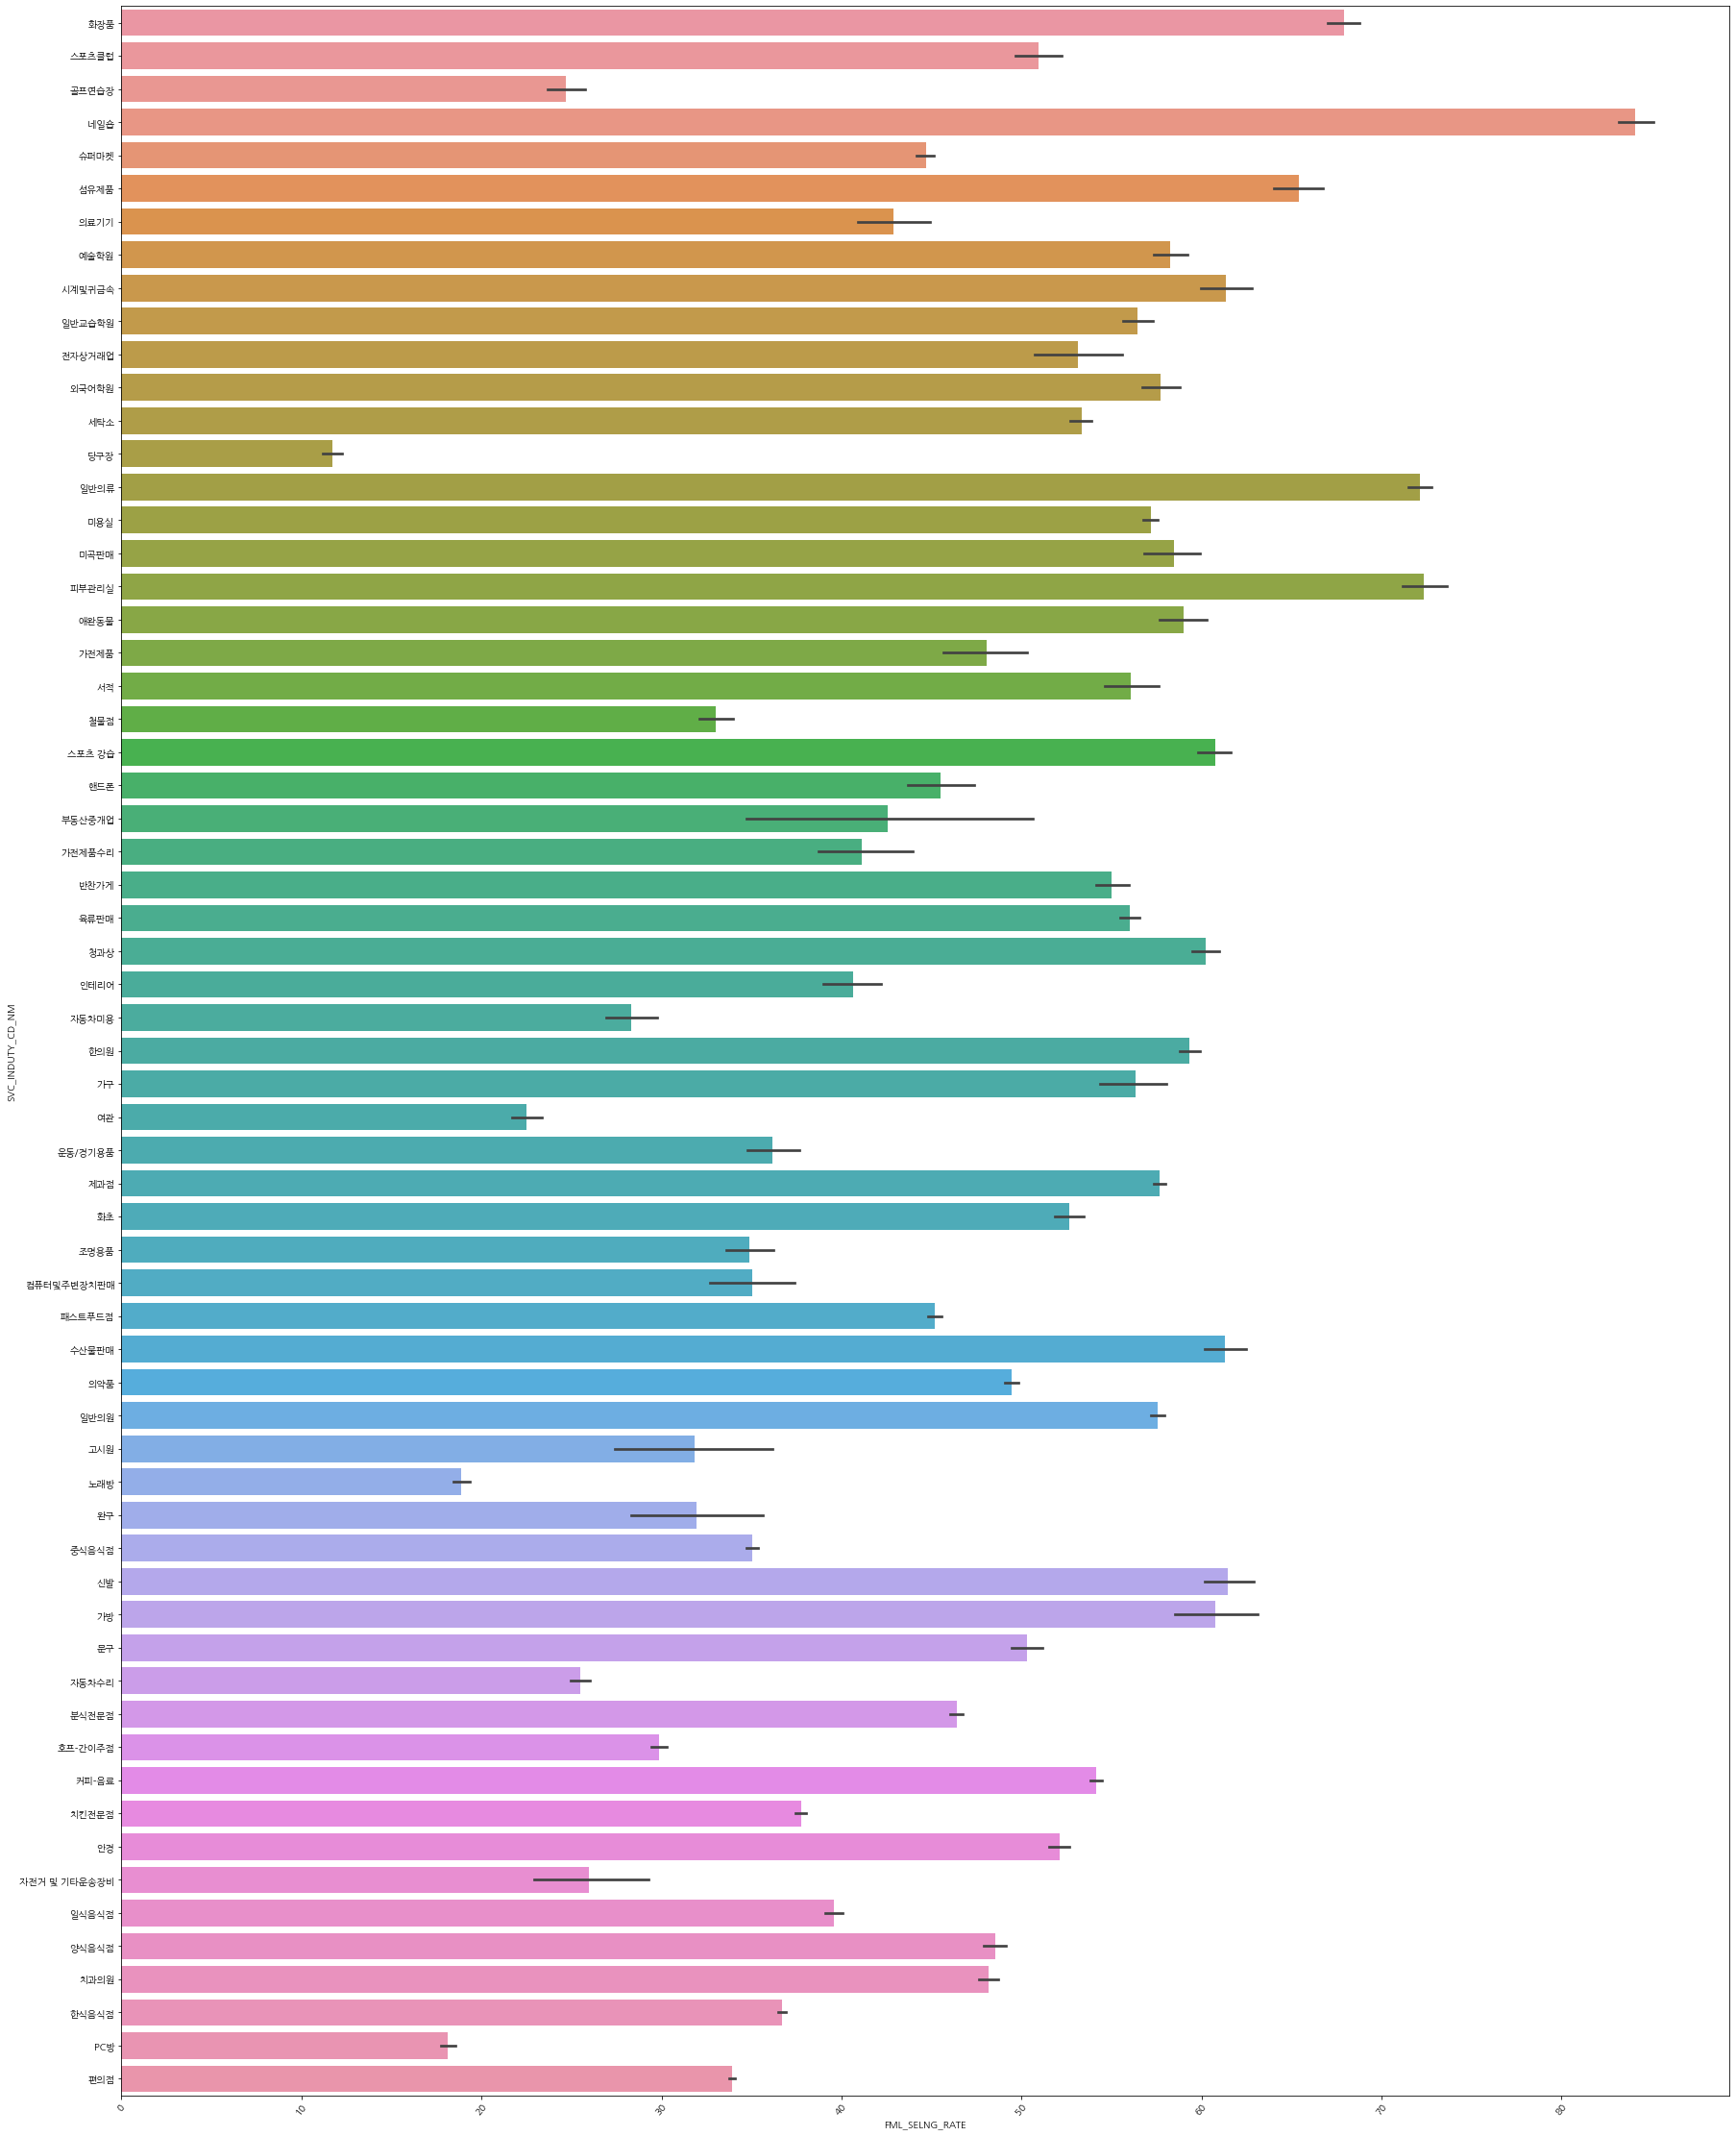

In [20]:
#서비스업종대분류코드별로 여성 매출 비율 그래프 
plt.figure(figsize=(30,40))  #size 조절
plt.xticks(rotation = 50)  #x축 조절

sns.barplot(data=df.sort_values(by='FML_SELNG_RATE', ascending=False), x = 'FML_SELNG_RATE',y = 'SVC_INDUTY_CD_NM')
plt.show()

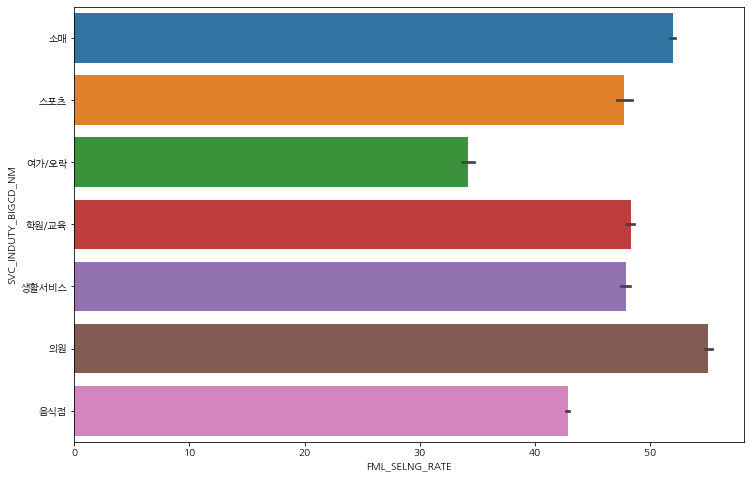

In [21]:
#서비스업종대분류코드별로 여성 매출 비율 그래프 
plt.figure(figsize=(12,8))  #size 조절
plt.xticks(rotation = 0)  #x축 조절
sns.barplot(data=df.sort_values(by='FML_SELNG_RATE', ascending=False), x = 'FML_SELNG_RATE',y = 'SVC_INDUTY_BIGCD_NM')
plt.show()

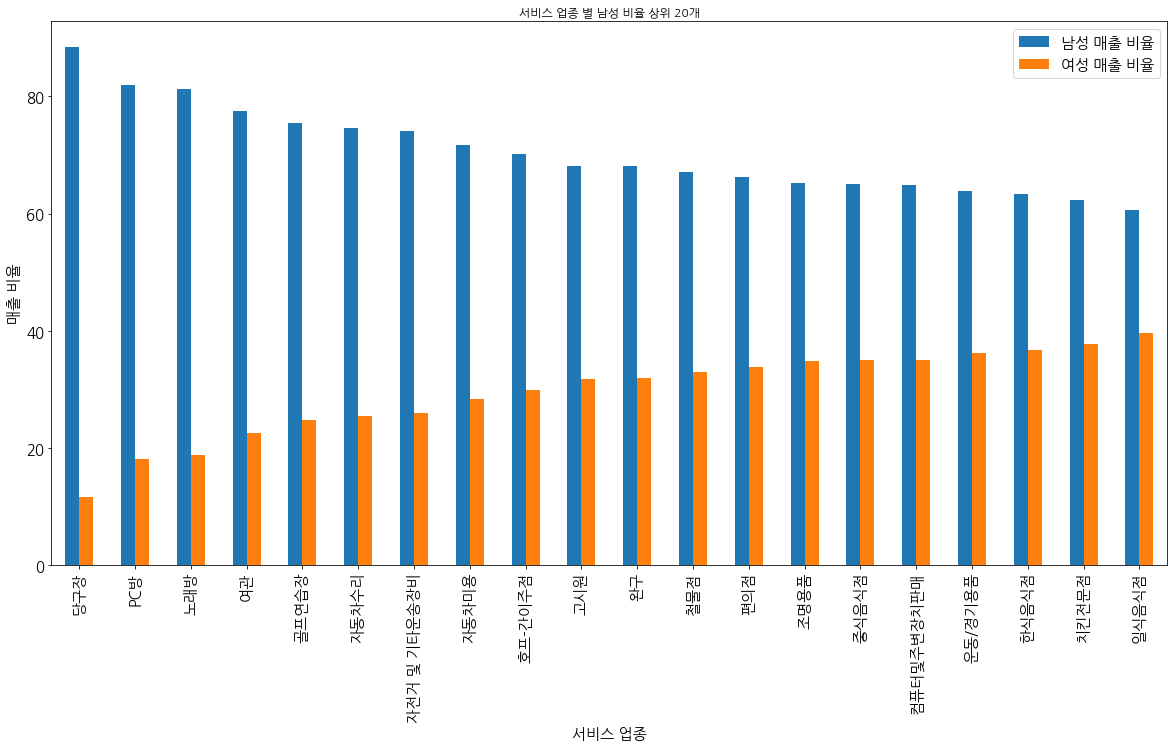

In [22]:
df_wmrate=df.groupby(['SVC_INDUTY_CD_NM']).mean()[['ML_SELNG_RATE', 'FML_SELNG_RATE']]
# 새로운 데이터셋에 서비스업종코드명,남성,여성_매출_비율로 생성

ax=df_wmrate.sort_values(by='ML_SELNG_RATE', ascending=False).head(20).plot(kind='bar', title='서비스 업종 별 남성 비율 상위 20개', figsize=(20, 10), legend=True, fontsize=15)
ax.set_xlabel('서비스 업종', fontsize=15)
ax.set_ylabel('매출 비율', fontsize=15)
ax.legend(['남성 매출 비율', '여성 매출 비율'], fontsize=15) 
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()
# 그래프를 그려줍니다.

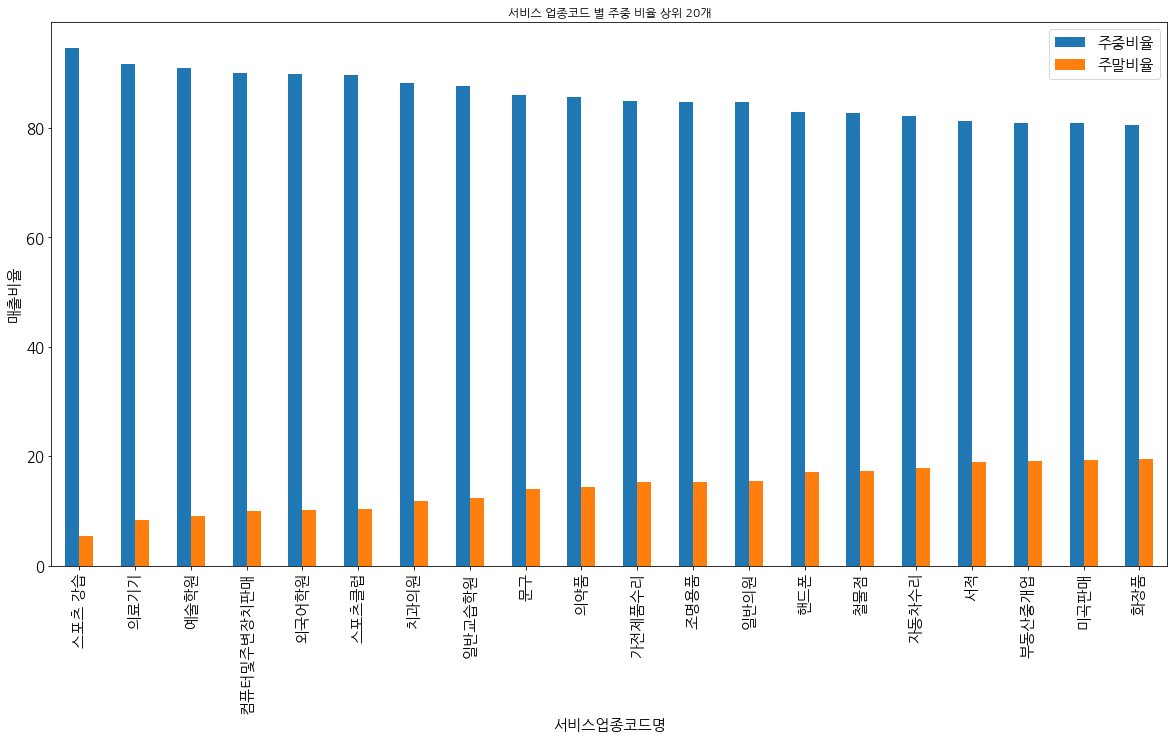

In [23]:
df_rate=df.groupby(['SVC_INDUTY_CD_NM']).mean()[['MDWK_SELNG_RATE','WKEND_SELNG_RATE']]
# 새로운 데이터셋에 서비스업종코드명,주중,주말_매출_비율로 생성

ax=df_rate.sort_values(by='MDWK_SELNG_RATE', ascending=False).head(20).plot(kind='bar', title='서비스 업종코드 별 주중 비율 상위 20개', figsize=(20, 10), legend=True, fontsize=15)
ax.set_xlabel('서비스업종코드명', fontsize=15)          # x축 정보 표시
ax.set_ylabel('매출비율', fontsize=15)     # y축 정보 표시
ax.legend(['주중비율', '주말비율'], fontsize=15) 
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()


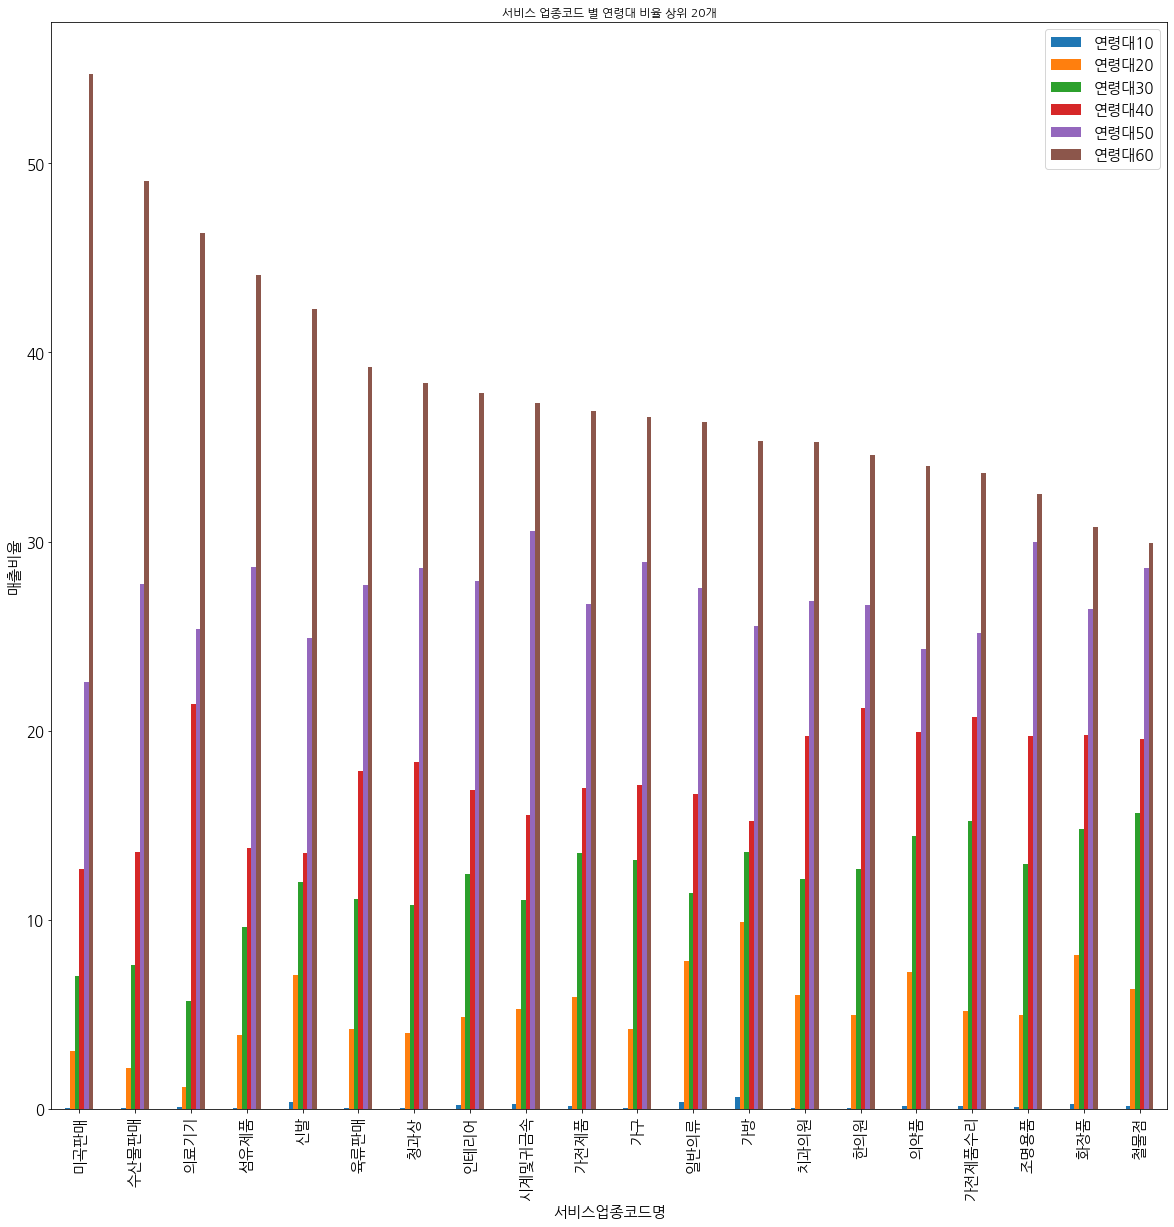

In [24]:
df_rate=df.groupby(['SVC_INDUTY_CD_NM']).mean()[['AGRDE_10_SELNG_RATE','AGRDE_20_SELNG_RATE','AGRDE_30_SELNG_RATE',
                      'AGRDE_40_SELNG_RATE','AGRDE_50_SELNG_RATE','AGRDE_60_ABOVE_SELNG_RATE']]
# 새로운 데이터셋에 서비스업종코드명,연령대_매출_비율로 생성

ax=df_rate.sort_values(by='AGRDE_60_ABOVE_SELNG_RATE', ascending=False).head(20).plot(kind='bar', title='서비스 업종코드 별 연령대 비율 상위 20개', figsize=(20, 20), legend=True, fontsize=15)
ax.set_xlabel('서비스업종코드명', fontsize=15)          # x축 정보 표시
ax.set_ylabel('매출비율', fontsize=15)     # y축 정보 표시
ax.legend(['연령대10',  '연령대20', '연령대30', '연령대40','연령대50','연령대60'], fontsize=15) 
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

In [25]:
#연령대가 60인 사람들은 의식주 해결 업종에서 매출비율이 높게 나타난다.

In [ ]:
plt.figure(figsize=(100,40))
# 첫 번째 그래프
sns.barplot(data=df, x='SVC_INDUTY_CD_NM', y='FML_SELNG_AMT', color='red')
# 두 번째 그래프
sns.barplot(data=df, x='SVC_INDUTY_CD_NM', y='ML_SELNG_AMT', color='blue')

# y축 레이블 설정
plt.ylabel('Sales')

# 범례 설정
plt.legend(labels=['FML_SELNG_AMT', 'ML_SELNG_AMT'])

# 그래프 표시
plt.show()

In [ ]:
#서비스 업종별로 여성 매출 건수의 차이 (성별에 따라 어떤 업종이 가장 인기있을까?)
plt.figure(figsize=(100,50))
sns.barplot(data=df, x='SVC_INDUTY_CD_NM', y='FML_SELNG_CO',hue='TRDAR_SE_CD_NM')
plt.title('서비스 업종별로 여성매출 건수의 차이 ')
plt.xticks(rotation =90)
plt.show()


In [ ]:
#

# 다양하게 시각화 하기 
sns.histplot,sns.boxplot,sns.scatterplot(x='', y='', data=df),sns.heatmap(df.corr(), annot=True)
sns.pairplot(data=titanic, vars=['', 'f', ''], hue='')

탐색적데이터분석(EDA),데이터가공(이상치, 결측값 등 처리)
,분석결과 시각화, 통계분석


### 06. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

In [ ]:
q1 = df['MDWK_SELNG_AMT'].quantile(0.25)
q3 = df['MDWK_SELNG_AMT'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [ ]:
df['MDWK_SELNG_AMT'].describe()

In [ ]:
df.loc[df['MDWK_SELNG_AMT'] < lower_bound, 'MDWK_SELNG_AMT'] = df['MDWK_SELNG_AMT'].median()
df.loc[df['MDWK_SELNG_AMT'] > upper_bound, 'MDWK_SELNG_AMT'] = df['MDWK_SELNG_AMT'].median()

In [ ]:
df['MDWK_SELNG_AMT'].describe()

### 07. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['variable'] = encoder.fit_transform(df['variable'])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df_imputed = imputer.fit_transform(df)

### 08. 결론 Conclusion
- EDA 과정에서 발견한 결과와 인사이트를 요약합니다.